In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime

In [70]:
train = pd.read_csv('filtered_train.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str, 'PATIENT_ID_COUNT':int})
test = pd.read_csv('test_dataset_test.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str})

In [71]:
train["VISIT_MONTH_YEAR"] = train["VISIT_MONTH_YEAR"].apply(lambda x: datetime(int("20" + x.split('.')[1]), int(x.split('.')[0]), 1))

In [75]:
patients_by_dates = train.groupby("VISIT_MONTH_YEAR")["PATIENT_ID_COUNT"].sum()

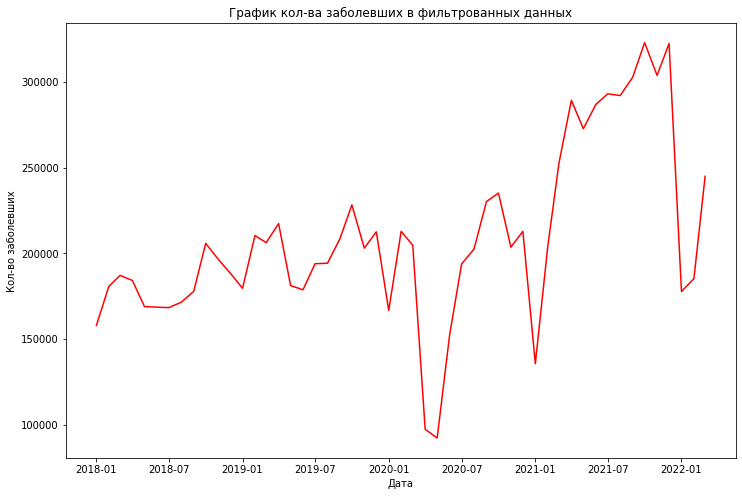

In [91]:
plt.figure(figsize=(12, 8))
plt.plot(patients_by_dates.keys(), patients_by_dates, color="red")
plt.xlabel("Дата")
plt.ylabel("Кол-во заболевших")
_ = plt.title("График кол-ва заболевших в фильтрованных данных")

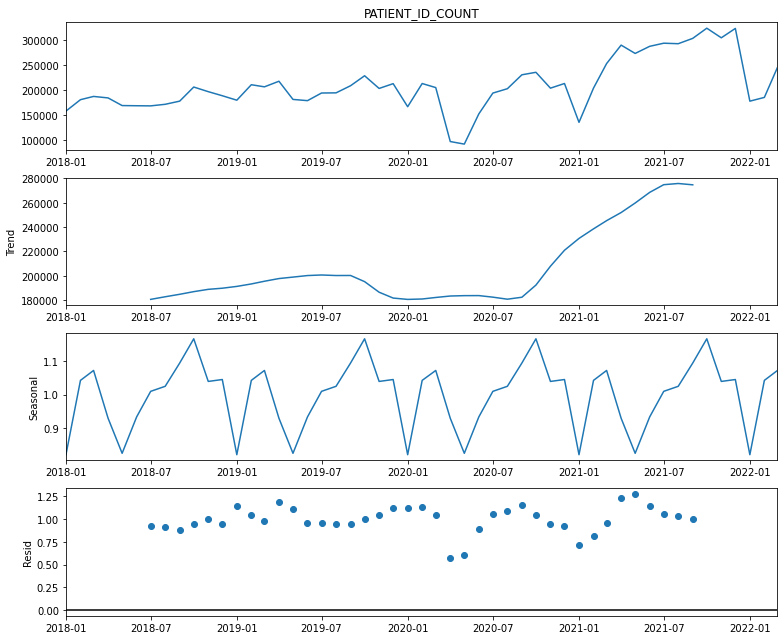

In [269]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
decompose = seasonal_decompose(patients_by_dates, model="multiplicative")
decompose.plot()
 
plt.show()

In [242]:
decompose.trend.iloc[:6] = decompose.trend.iloc[7]
decompose.trend.iloc[-6:] = decompose.trend.iloc[-7]

In [275]:
trend = decompose.trend.dropna()

In [276]:
trend_coefs = []
for i in range(len(trend)-1):
    trend_coefs.append(trend.iloc[i+1] / trend.iloc[i])

In [277]:
trend_coefs = [trend_coefs[0]]*6 + trend_coefs + [trend_coefs[-1]]*6

In [288]:
import pickle

In [290]:
with open("trend_coefs.pkl", "wb") as fout:
    pickle.dump(trend_coefs, fout)